# Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import torch.nn as nn
import glob
import matplotlib.tri as tri
import pandas as pd
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
import imageio
from typing import Tuple, Union
from torchsummary import summary
from tqdm import tqdm as tqdm
from sklearn.model_selection import train_test_split
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import math
from scipy.interpolate import interp1d
from torch.utils.data import Dataset, DataLoader
import copy
from torchvision import transforms
import torchvision
import torch.nn.init as init
from scipy.linalg import norm
from skimage.transform import resize
import shutil
import cv2
from scipy.linalg import svd

# Load

In [67]:
data = np.load('POD_data_Base_Mid_v_x.npz')
S__Base_Mid_vx       = data['S']
S__Base_Mid_vx       = np.cumsum( S__Base_Mid_vx ) / np.sum( S__Base_Mid_vx )
RecErr___Base_Mid_vx = data['Reconst_error']

data = np.load('POD_data_Base_Mid_v_y.npz')
S__Base_Mid_vy       = data['S']
S__Base_Mid_vy       = np.cumsum( S__Base_Mid_vy ) / np.sum( S__Base_Mid_vy )
RecErr___Base_Mid_vy = data['Reconst_error']

data = np.load('POD_data_Base_Mid_v_z.npz')
S__Base_Mid_vz       = data['S']
S__Base_Mid_vz       = np.cumsum( S__Base_Mid_vz ) / np.sum( S__Base_Mid_vz )
RecErr___Base_Mid_vz = data['Reconst_error']


data = np.load('POD_data_Sten_Mid_v_x.npz')
S__Sten_Mid_vx       = data['S']
S__Sten_Mid_vx       = np.cumsum( S__Sten_Mid_vx ) / np.sum( S__Sten_Mid_vx )
RecErr___Sten_Mid_vx = data['Reconst_error']

data = np.load('POD_data_Sten_Mid_v_y.npz')
S__Sten_Mid_vy       = data['S']
S__Sten_Mid_vy       = np.cumsum( S__Sten_Mid_vy ) / np.sum( S__Sten_Mid_vy )
RecErr___Sten_Mid_vy = data['Reconst_error']

data = np.load('POD_data_Sten_Mid_v_z.npz')
S__Sten_Mid_vz       = data['S']
S__Sten_Mid_vz       = np.cumsum( S__Sten_Mid_vz ) / np.sum( S__Sten_Mid_vz )
RecErr___Sten_Mid_vz = data['Reconst_error']

In [68]:
data = np.load('POD_data_Base_Wall_Pressure.npz')
S__Base_Wall_pre       = data['S']
S__Base_Wall_pre       = np.cumsum( S__Base_Wall_pre ) / np.sum( S__Base_Wall_pre )
RecErr___Base_Wall_pre = data['Reconst_error']

data = np.load('POD_data_Base_Wall_OSI.npz')
S__Base_Wall_osi       = data['S']
S__Base_Wall_osi       = np.cumsum( S__Base_Wall_osi ) / np.sum( S__Base_Wall_osi )
RecErr___Base_Wall_osi = data['Reconst_error']

data = np.load('POD_data_Base_Wall_WSS.npz')
S__Base_Wall_wss       = data['S']
S__Base_Wall_wss       = np.cumsum( S__Base_Wall_wss ) / np.sum( S__Base_Wall_wss )
RecErr___Base_Wall_wss = data['Reconst_error']


data = np.load('POD_data_Sten_Wall_Pressure.npz')
S__Sten_Wall_pre       = data['S']
S__Sten_Wall_pre       = np.cumsum( S__Sten_Wall_pre ) / np.sum( S__Sten_Wall_pre )
RecErr___Sten_Wall_pre = data['Reconst_error']

data = np.load('POD_data_Sten_Wall_OSI.npz')
S__Sten_Wall_osi       = data['S']
S__Sten_Wall_osi       = np.cumsum( S__Sten_Wall_osi ) / np.sum( S__Sten_Wall_osi )
RecErr___Sten_Wall_osi = data['Reconst_error']

data = np.load('POD_data_Sten_Wall_WSS.npz')
S__Sten_Wall_wss       = data['S']
S__Sten_Wall_wss       = np.cumsum( S__Sten_Wall_wss ) / np.sum( S__Sten_Wall_wss )
RecErr___Sten_Wall_wss = data['Reconst_error']

# Error Plots

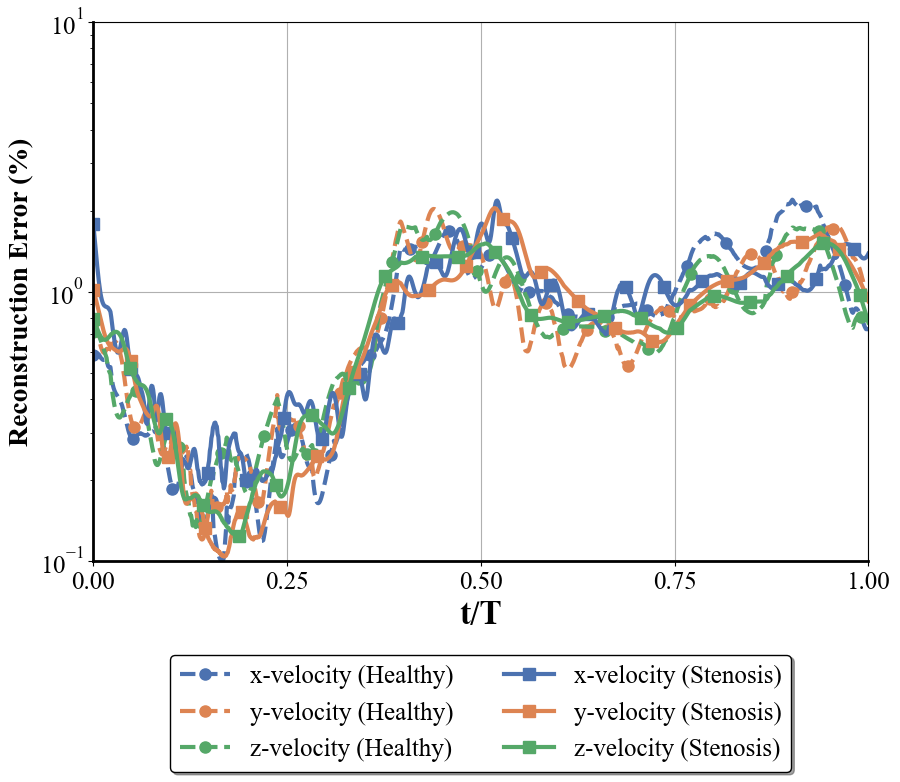

In [155]:
colors = sns.color_palette("deep", n_colors=100)
plt.rc('font', family='Times New Roman', size=18)

n_show = 40

plt.figure(figsize=(10, 7))

plt.plot(np.linspace(0, 1, 1000), RecErr___Base_Mid_vx, label='x-velocity (Healthy)', color=colors[0], linewidth=3, marker='o', markersize=8, markevery=51, linestyle='--')
plt.plot(np.linspace(0, 1, 1000), RecErr___Base_Mid_vy, label='y-velocity (Healthy)', color=colors[1], linewidth=3, marker='o', markersize=8, markevery=53, linestyle='--')
plt.plot(np.linspace(0, 1, 1000), RecErr___Base_Mid_vz, label='z-velocity (Healthy)', color=colors[2], linewidth=3, marker='o', markersize=8, markevery=55, linestyle='--')
plt.plot(np.linspace(0, 1, 999), RecErr___Sten_Mid_vx, label='x-velocity (Stenosis)', color=colors[0], linewidth=3, marker='s', markersize=8, markevery=49)
plt.plot(np.linspace(0, 1, 999), RecErr___Sten_Mid_vy/8, label='y-velocity (Stenosis)', color=colors[1], linewidth=3, marker='s', markersize=8, markevery=48)
plt.plot(np.linspace(0, 1, 999), RecErr___Sten_Mid_vz/5, label='z-velocity (Stenosis)', color=colors[2], linewidth=3, marker='s', markersize=8, markevery=47)

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)  # X-axis line width
ax.spines['left'].set_linewidth(2)    # Y-axis line width

plt.xlabel('t/T', fontsize=24, weight='bold')
plt.ylabel('Reconstruction Error (%)', fontsize=20, weight='bold')

plt.xlim(0, 1)  # X-axis range from 1 to 40
plt.ylim(0.1, 5)  # Y-axis range from 0.6 to 1
plt.xticks(np.linspace(0,1,5))
plt.yticks([0.1, 1, 10])
plt.yscale('log')
# Main legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:], labels=labels[:], frameon=True, edgecolor='black', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

plt.grid(True)

# Save and show the plot
plt.savefig('Reconstruction Error - Mid Plane.jpg', dpi=400, bbox_inches='tight')
plt.show()


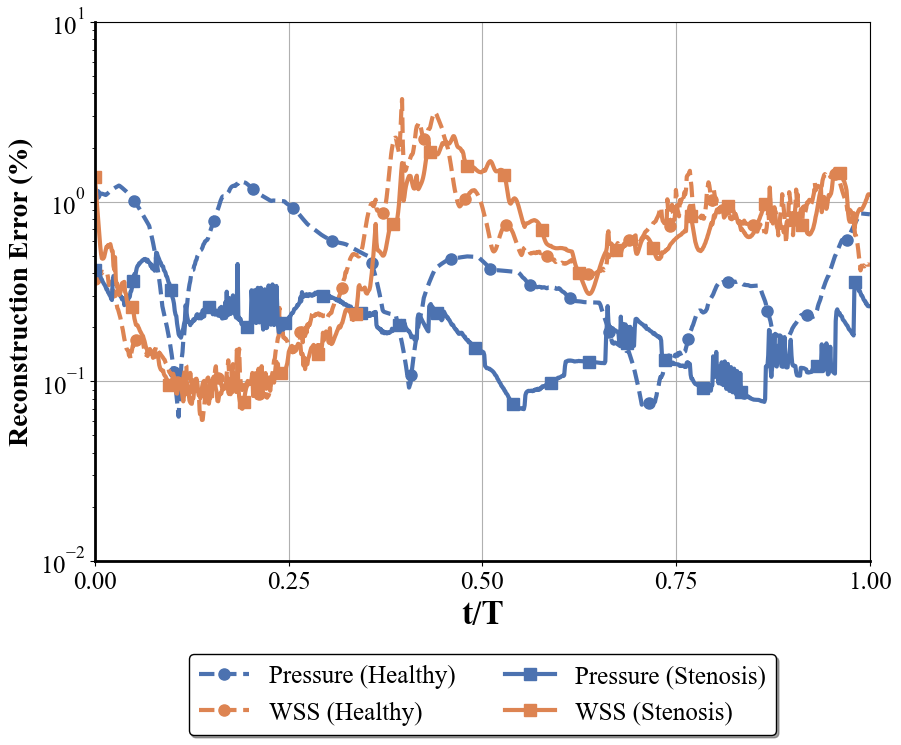

In [172]:
colors = sns.color_palette("deep", n_colors=100)
plt.rc('font', family='Times New Roman', size=18)

n_show = 40

plt.figure(figsize=(10, 7))

# averaging !
# Number of neighbors on each side
num_neighbors = 8
# Pad the array to handle boundary conditions
padded_array = np.pad(RecErr___Base_Wall_pre, pad_width=num_neighbors, mode='edge')
# Compute the moving average with 5 neighbors on each side
averaged_array = np.convolve(padded_array, np.ones(2 * num_neighbors + 1) / (2 * num_neighbors + 1), mode='valid')



plt.plot(np.linspace(0, 1, 1000), averaged_array, label='Pressure (Healthy)', color=colors[0], linewidth=3, marker='o', markersize=8, markevery=51, linestyle='--')
plt.plot(np.linspace(0, 1, 1000), RecErr___Base_Wall_wss, label='WSS (Healthy)', color=colors[1], linewidth=3, marker='o', markersize=8, markevery=53, linestyle='--')
# plt.plot(np.linspace(0, 1, 1000), RecErr___Base_Mid_vz, label='z-velocity (Healthy)', color=colors[2], linewidth=3, marker='o', markersize=8, markevery=55, linestyle='--')
plt.plot(np.linspace(0, 1, 1000), RecErr___Sten_Wall_pre, label='Pressure (Stenosis)', color=colors[0], linewidth=3, marker='s', markersize=8, markevery=49)
plt.plot(np.linspace(0, 1, 1000), RecErr___Sten_Wall_wss, label='WSS (Stenosis)', color=colors[1], linewidth=3, marker='s', markersize=8, markevery=48)
# plt.plot(np.linspace(0, 1, 999), RecErr___Sten_Mid_vz/5, label='z-velocity (Stenosis)', color=colors[2], linewidth=3, marker='s', markersize=8, markevery=47)

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)  # X-axis line width
ax.spines['left'].set_linewidth(2)    # Y-axis line width

plt.xlabel('t/T', fontsize=24, weight='bold')
plt.ylabel('Reconstruction Error (%)', fontsize=20, weight='bold')

plt.xlim(0, 1)  # X-axis range from 1 to 40
plt.ylim(0.01, 5)  # Y-axis range from 0.6 to 1
plt.xticks(np.linspace(0,1,5))
plt.yticks([0.01, 0.1, 1, 10])
plt.yscale('log')
# Main legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:], labels=labels[:], frameon=True, edgecolor='black', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

plt.grid(True)

# Save and show the plot
plt.savefig('Reconstruction Error - Wall.jpg', dpi=400, bbox_inches='tight')
plt.show()


# Mode Plots

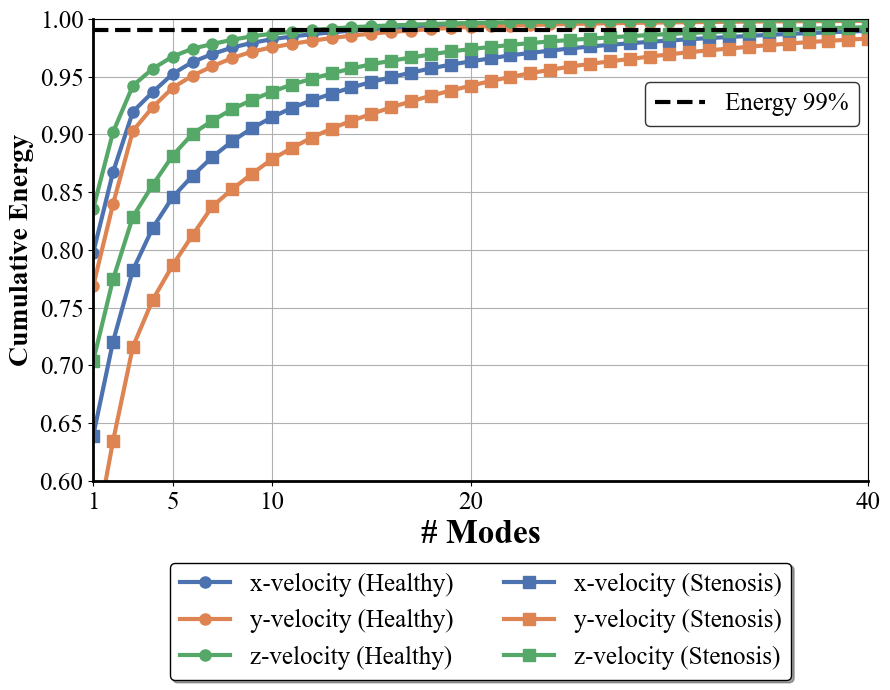

In [101]:
colors = sns.color_palette("deep", n_colors=100)
plt.rc('font', family='Times New Roman', size=18)

n_show = 40

plt.figure(figsize=(10, 6))

plt.plot(np.arange(1, n_show+1), S__Base_Mid_vx[:n_show], label='x-velocity (Healthy)', color=colors[0], linewidth=3, marker='o', markersize=8)
plt.plot(np.arange(1, n_show+1), S__Base_Mid_vy[:n_show], label='y-velocity (Healthy)', color=colors[1], linewidth=3, marker='o', markersize=8)
plt.plot(np.arange(1, n_show+1), S__Base_Mid_vz[:n_show], label='z-velocity (Healthy)', color=colors[2], linewidth=3, marker='o', markersize=8)
plt.plot(np.arange(1, n_show+1), S__Sten_Mid_vx[:n_show], label='x-velocity (Stenosis)', color=colors[0], linewidth=3, marker='s', markersize=8)
plt.plot(np.arange(1, n_show+1), S__Sten_Mid_vy[:n_show], label='y-velocity (Stenosis)', color=colors[1], linewidth=3, marker='s', markersize=8)
plt.plot(np.arange(1, n_show+1), S__Sten_Mid_vz[:n_show], label='z-velocity (Stenosis)', color=colors[2], linewidth=3, marker='s', markersize=8)

# Add the horizontal line for 99% energy
hline = plt.plot([1, n_show], [0.99, 0.99], label='Energy 99%', color='black', linestyle='--', linewidth=3)

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)  # X-axis line width
ax.spines['left'].set_linewidth(2)    # Y-axis line width

plt.xlabel('# Modes', fontsize=24, weight='bold')
plt.ylabel('Cumulative Energy', fontsize=20, weight='bold')

plt.xlim(1, 40)  # X-axis range from 1 to 40
plt.ylim(0.6, 1)  # Y-axis range from 0.6 to 1
plt.xticks([1, 5, 10, 20, 40])

# Main legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:-1], labels=labels[:-1], frameon=True, edgecolor='black', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Standalone legend for horizontal line
from matplotlib.legend import Legend
legend_hline = Legend(ax, handles=hline, labels=['Energy 99%'], loc='center', bbox_to_anchor=(0.85, 0.815), frameon=True, edgecolor='black')
ax.add_artist(legend_hline)

plt.grid(True)

# Save and show the plot
plt.savefig('Cumulative Energy - Mid Plane.jpg', dpi=400, bbox_inches='tight')
plt.show()


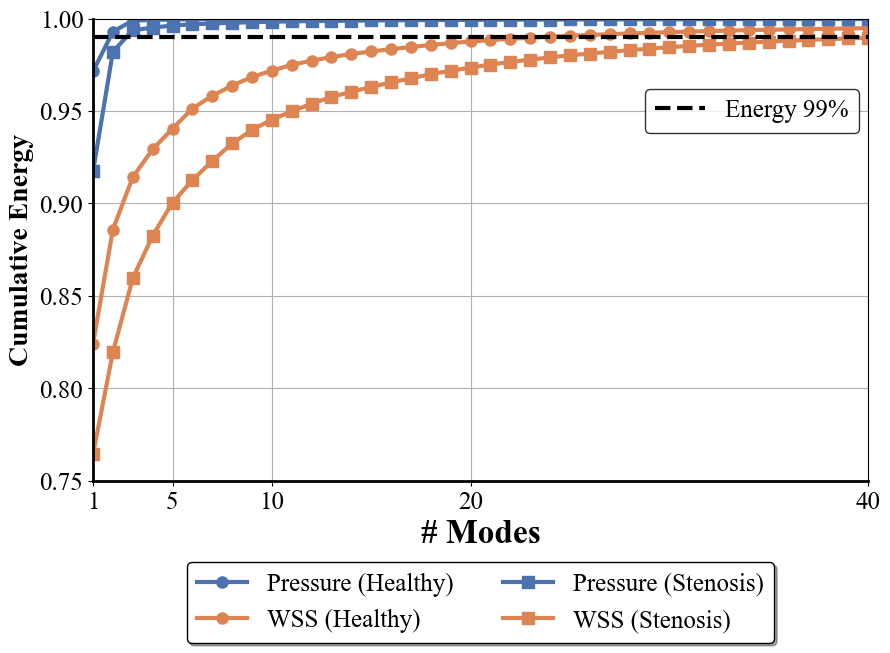

In [113]:
colors = sns.color_palette("deep", n_colors=100)
plt.rc('font', family='Times New Roman', size=18)

n_show = 40

plt.figure(figsize=(10, 6))

plt.plot(np.arange(1, n_show+1), S__Base_Wall_pre[:n_show], label='Pressure (Healthy)', color=colors[0], linewidth=3, marker='o', markersize=8)
plt.plot(np.arange(1, n_show+1), S__Base_Wall_wss[:n_show], label='WSS (Healthy)', color=colors[1], linewidth=3, marker='o', markersize=8)
# plt.plot(np.arange(1, n_show+1), S__Base_Wall_osi[:n_show], label='OSI (Healthy)', color=colors[2], linewidth=3, marker='o', markersize=8)
plt.plot(np.arange(1, n_show+1), S__Sten_Wall_pre[:n_show], label='Pressure (Stenosis)', color=colors[0], linewidth=3, marker='s', markersize=8)
plt.plot(np.arange(1, n_show+1), S__Sten_Wall_wss[:n_show], label='WSS (Stenosis)', color=colors[1], linewidth=3, marker='s', markersize=8)
# plt.plot(np.arange(1, n_show+1), S__Sten_Wall_osi[:n_show], label='OSI (Stenosis)', color=colors[2], linewidth=3, marker='s', markersize=8)

# Add the horizontal line for 99% energy
hline = plt.plot([1, n_show], [0.99, 0.99], label='Energy 99%', color='black', linestyle='--', linewidth=3)

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)  # X-axis line width
ax.spines['left'].set_linewidth(2)    # Y-axis line width

plt.xlabel('# Modes', fontsize=24, weight='bold')
plt.ylabel('Cumulative Energy', fontsize=20, weight='bold')

plt.xlim(1, 40)  # X-axis range from 1 to 40
plt.ylim(0.75, 1)  # Y-axis range from 0.6 to 1
plt.xticks([1, 5, 10, 20, 40])

# Main legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:-1], labels=labels[:-1], frameon=True, edgecolor='black', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Standalone legend for horizontal line
from matplotlib.legend import Legend
legend_hline = Legend(ax, handles=hline, labels=['Energy 99%'], loc='center', bbox_to_anchor=(0.85, 0.8), frameon=True, edgecolor='black')
ax.add_artist(legend_hline)

plt.grid(True)

# Save and show the plot
plt.savefig('Cumulative Energy - Wall.jpg', dpi=400, bbox_inches='tight')
plt.show()
